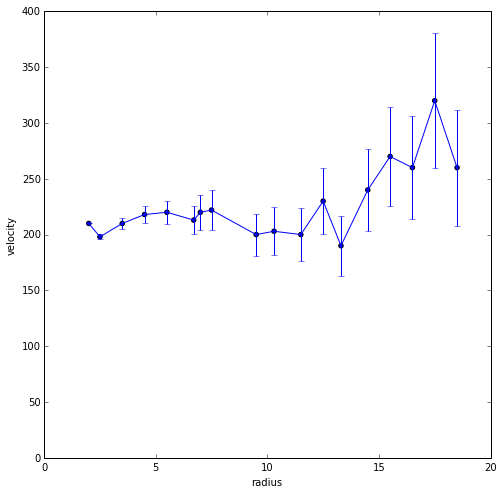

In [173]:
#2
import numpy as np
import matplotlib.pyplot as plt

#2
#a
r = [2, 2.5, 3.5, 4.5, 5.5, 6.7, 7, 7.5, 9.5, 10.3, 11.5, 12.5, 13.3, 14.5, 15.5, 16.5, 17.5, 18.5]
v = [210, 198, 210, 218, 220, 213, 220, 222, 200, 203, 200, 230, 190, 240, 270, 260, 320, 260]

#error increases from 0 to 0.2 along the y. Can multiply v * err to get new array (they are same length) of y error.
err = np.linspace(0, 0.2, len(r))
yerror = v * err

fig = plt.figure(1, figsize=(8,8))
plt.errorbar(r, v, yerr = yerror)

ax1 = fig.add_subplot(111)
ax1.scatter(r, v)
ax1.set_ylim(0, 400)
ax1.set_xlabel("radius")
ax1.set_ylabel("velocity")

plt.show()

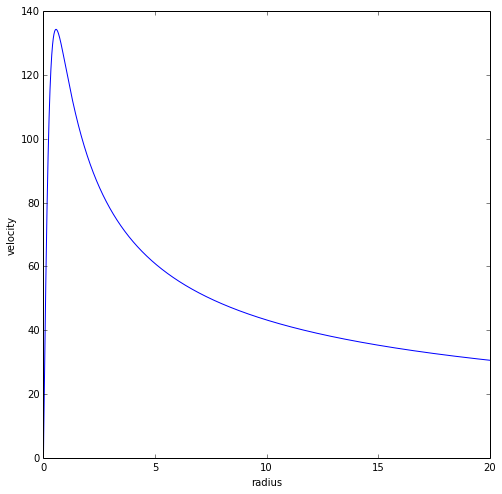

In [185]:
#b

#define constants
Ms = 2E30 #kg
pi = np.pi
G = 6.67 * (10 ** -11)

Mb = (1.3E10)*Ms
Md = (6.5E10)*Ms
Mh = (1.0E9)

a_b = 0.4*(3.086E19) #m
a_d = 4.0*(3.086E19) #m
a_h = 0.5 #m

#convert to SI, then convert back
#for the bulge
def p_b(r_step):
    p0 = (Mb/(4.0*pi*a_b*a_b*a_b))*((1.0 + (r_step/a_b)**2)**(-2.5))
    return p0

def dmdr_b(r_step):
    p0 = p_b(r_step)
    dmdr0 = 4.0*pi*r_step*r_step*p0
    return dmdr0

#initialize M_b
M_b0 = 0
M_b = M_b0
M_bulge = list()

#create stepsize
r_max = 20*(3.086E19) #m
r_b = np.linspace(0.001, r_max, 10000)

#calculate M_b
for i in r_b:
    M_b = M_b + dmdr_b(i) * (r_max/10000.0)
    M_bulge.append(M_b)
    
#calculate rotation curve for v
v_bulge = list()
for i, j in zip(M_bulge, r_b):
    v_b = ((G * i)/j) ** 0.5
    v_bulge.append(v_b)

#convert to km, kpc
v_bulge = [x * (10 ** -3) for x in v_bulge]
r_b = [x * (3.24* (10 ** -20)) for x in r_b]

fig = plt.figure(1, figsize=(8,8))

ax1 = fig.add_subplot(111)
ax1.plot(r_b, v_bulge)
ax1.set_xlabel("radius")
ax1.set_ylabel("velocity")

plt.show()


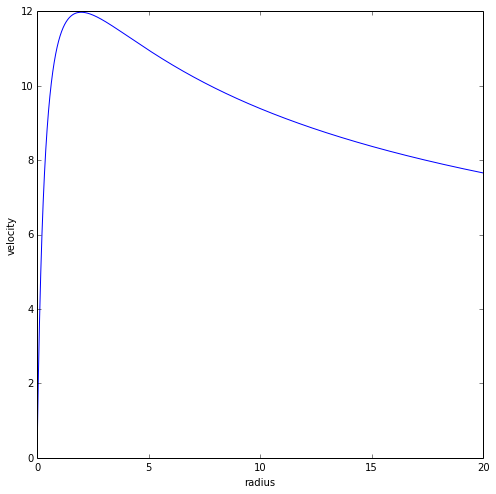

In [186]:
#for the halo

def p_h(r_step):
    p0 = ((Mh)*((a_h + (r_step/3.086E19)) ** (-3.1)))*((Ms)/((3.086E19)**3.1))
    return p0

def dmdr_h(r_step):
    p0 = p_h(r_step)
    dmdr0 = 4.0*pi*r_step*r_step*p0
    return dmdr0


#initialize M_h
M_h0 = 0
M_h = M_h0
M_halo = list()

#create stepsize
r_max = 20*(3.086E19) #m
r_h = np.linspace(0.001, r_max, 10000)

#calculate M_h
for i in r_h:
    M_h = M_h + dmdr_h(i) * (r_max/10000.0)
    M_halo.append(M_h)

#calculate rotation curve for v
v_halo = list()
for i, j in zip(M_halo, r_h):
    v_h = ((G * i)/j) ** 0.5
    v_halo.append(v_h)

#convert to km, kpc
v_halo = [x * (10 ** -3) for x in v_halo]
r_h = [x * (3.24* (10 ** -20)) for x in r_h]

fig = plt.figure(1, figsize=(8,8))

ax1 = fig.add_subplot(111)
ax1.plot(r_h, v_halo)
ax1.set_xlabel("radius")
ax1.set_ylabel("velocity")

plt.show()

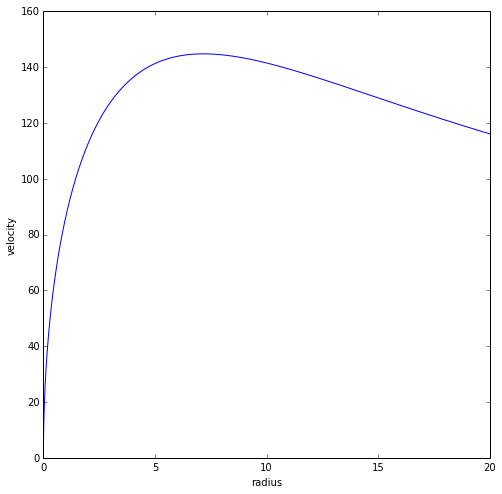

In [176]:
#for the disk
def p_d(r_step):
    p0 = (Md/(2*pi*a_d*a_d))*pow(np.e, -((r_step)/a_d))
    return p0

def dmdr_d(r_step):
    p0 = p_d(r_step)
    dmdr0 = 2*pi*r_step*p0
    return dmdr0

#initialize M_d
M_d0 = 0
M_d = M_d0
M_disk = list()

#create stepsize
r_max = 20*(3.086E19) #m
r_d = np.linspace(0.001, r_max, 10000)

#calculate M_d
for i in r_d:
    M_d = M_d + dmdr_d(i) * (r_max/10000.0)
    M_disk.append(M_d)
    
#calculate rotation curve for v
v_disk = list()
for i, j in zip(M_disk, r_d):
    v_d = ((G * i)/j) ** 0.5
    v_disk.append(v_d)
    
#convert to km, kpc
v_disk = [x * (10 ** -3) for x in v_disk]
r_d = [x * (3.24* (10 ** -20)) for x in r_d]

fig = plt.figure(1, figsize=(8,8))

ax1 = fig.add_subplot(111)
ax1.plot(r_b, v_disk)
ax1.set_xlabel("radius")
ax1.set_ylabel("velocity")

plt.show()

In [188]:
#calculate M_total
M_total = [M_bulge[i] + M_halo[i] + M_disk[i] for i in range(len(M_bulge))]

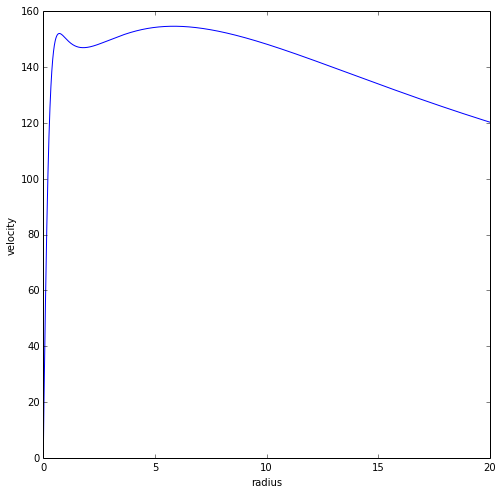

In [178]:
#create stepsize
r_max = 20*(3.086E19) #m
r_t = np.linspace(0.001, r_max, 10000)

#calculate rotation curve for v
v_total = list()
for i, j in zip(M_total, r_t):
    v_t = ((G * i)/j) ** 0.5
    v_total.append(v_t)

#convert to km, kpc    
v_total = [x * (10 ** -3) for x in v_total]
r_d = [x * (3.24* (10 ** -20)) for x in r_d]

fig = plt.figure(1, figsize=(8,8))

ax1 = fig.add_subplot(111)
ax1.plot(r_b, v_total)
ax1.set_xlabel("radius")
ax1.set_ylabel("velocity")

plt.show()
        

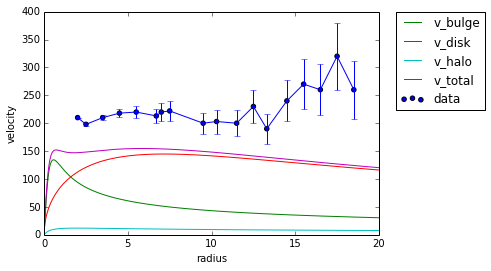

In [179]:
#plotting everything together
r = [2, 2.5, 3.5, 4.5, 5.5, 6.7, 7, 7.5, 9.5, 10.3, 11.5, 12.5, 13.3, 14.5, 15.5, 16.5, 17.5, 18.5]
v = [210, 198, 210, 218, 220, 213, 220, 222, 200, 203, 200, 230, 190, 240, 270, 260, 320, 260]
plt.scatter(r, v, label = "data")
plt.errorbar(r, v, yerr = yerror)
plt.plot(r_b,v_bulge, label = "v_bulge") 
plt.plot(r_b,v_disk, label = "v_disk") 
plt.plot(r_b,v_halo, label = "v_halo")
plt.plot(r_b, v_total, label = "v_total")
plt.ylim(0, 400)
plt.xlim(0, 20)
plt.xlabel("radius")
plt.ylabel("velocity")
#create legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

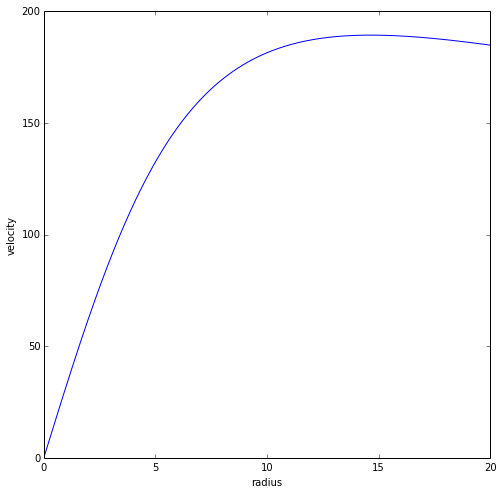

In [180]:
#for the dark matter halo
Mdm = 7.5E41
a_dm = 8.0*3.096E19
def p_dm(r_step):
    p0 = (Mdm/(4.0*pi*a_dm*a_dm*a_dm))*((1.0 + (r_step/a_dm)**2)**(-2.0))
    return p0

def dmdr_dm(r_step):
    p0 = p_dm(r_step)
    dmdr0 = 4.0*pi*r_step*r_step*p0
    return dmdr0

#initialize M_dm
M_dm0 = 0
M_dm = M_dm0
M_darkmatter = list()

#create stepsize
r_max = 20*(3.086E19) #m
r_dm = np.linspace(0.001, r_max, 10000)

#calculate M_dm
for i in r_dm:
    M_dm = M_dm + dmdr_dm(i) * (r_max/10000.0)
    M_darkmatter.append(M_dm)

#calculate rotation curve for v
v_darkmatter = list()
for i, j in zip(M_darkmatter, r_dm):
    v_dm = ((G * i)/j) ** 0.5
    v_darkmatter.append(v_dm)

#convert to km, kpc
v_darkmatter = [x * (10 ** -3) for x in v_darkmatter]
r_dm = [x * (3.24* (10 ** -20)) for x in r_dm]

fig = plt.figure(1, figsize=(8,8))

ax1 = fig.add_subplot(111)
ax1.plot(r_dm, v_darkmatter)
ax1.set_xlabel("radius")
ax1.set_ylabel("velocity")

plt.show()


In [181]:
#calculate M_totdm
M_totdm = [M_bulge[i] + M_halo[i] + M_disk[i] + M_darkmatter[i] for i in range(len(M_bulge))]

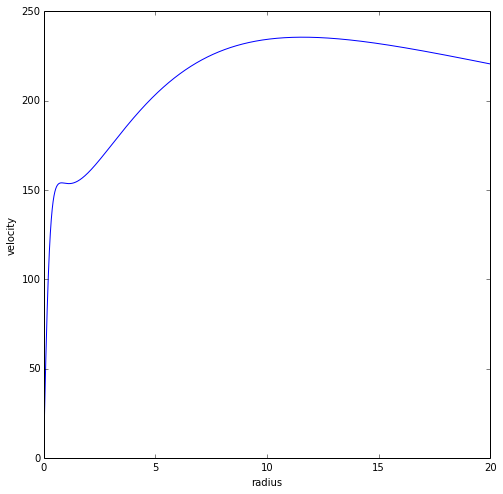

In [182]:
#create stepsize
import numpy as np

r_max = 20*(3.086E19) #m
r_tdm = np.linspace(0.001, r_max, 10000)

#calculate rotation curve for v
v_totdm = list()
for i, j in zip(M_totdm, r_tdm):
    v_tdm = ((G * i)/j) ** 0.5
    v_totdm.append(v_tdm)

#convert to km, kpc    
v_totdm = [x * (10 ** -3) for x in v_totdm]
r_tdm = [x * (3.24* (10 ** -20)) for x in r_tdm]

fig = plt.figure(1, figsize=(8,8))

ax1 = fig.add_subplot(111)
ax1.plot(r_tdm, v_totdm)
ax1.set_xlabel("radius")
ax1.set_ylabel("velocity")

plt.show()
        

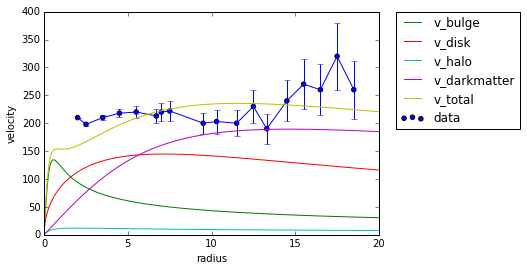

In [183]:
#plotting everything together
r = [2, 2.5, 3.5, 4.5, 5.5, 6.7, 7, 7.5, 9.5, 10.3, 11.5, 12.5, 13.3, 14.5, 15.5, 16.5, 17.5, 18.5]
v = [210, 198, 210, 218, 220, 213, 220, 222, 200, 203, 200, 230, 190, 240, 270, 260, 320, 260]
plt.scatter(r, v, label = "data")
plt.errorbar(r, v, yerr = yerror)
plt.plot(r_b, v_bulge, label = "v_bulge") 
plt.plot(r_b, v_disk, label = "v_disk") 
plt.plot(r_b, v_halo, label = "v_halo")
plt.plot(r_b, v_darkmatter, label = "v_darkmatter")
plt.plot(r_b, v_totdm, label = "v_total") 
plt.ylim(0, 400)
plt.xlim(0, 20)
plt.xlabel("radius")
plt.ylabel("velocity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()